In [2]:
#import pandas library
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv('Fake_Real_Data.csv')
df.head()


#print the shape of dataframe
df.shape



(9900, 2)

In [3]:
#print top 5 rows
df.head(5)

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:

#check the distribution of labels
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [5]:

#Add the new column "label_num" which gives a unique number to each of these labels
df['label_num'] = df['label'].apply(lambda x: 1 if x == 'Fake' else 0)
df.head(5)
#check the results with top 5 rows

#Modelling without Pre-processing Text data
#import train-test-split from sklearn


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#print the shapes of X_train and X_test

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1
1,U.S. conservative leader optimistic of common ...,Real,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1
4,Democrats say Trump agrees to work on immigrat...,Real,0


In [6]:
#Modelling without Pre-processing Text data
#import train-test-split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Text,df.label_num, test_size=0.2, random_state=42)


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#print the shapes of X_train and X_test
X_train.shape

(7920,)

In [7]:
X_test.shape

(1980,)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('classifier',KNeighborsClassifier(n_neighbors=10,metric='euclidean')),
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1007
           1       0.98      0.41      0.57       973

    accuracy                           0.70      1980
   macro avg       0.81      0.70      0.67      1980
weighted avg       0.80      0.70      0.68      1980



In [14]:
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('classifier',KNeighborsClassifier(n_neighbors=10,metric='cosine')),
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1007
           1       1.00      0.57      0.73       973

    accuracy                           0.79      1980
   macro avg       0.85      0.79      0.78      1980
weighted avg       0.85      0.79      0.78      1980



In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('classifier',RandomForestClassifier()),
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       1.00      1.00      1.00       973

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('classifier',MultinomialNB(alpha=0.75)),
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1007
           1       0.98      0.98      0.98       973

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [20]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

/Users/satishmokkala/PycharmProjects/NLP/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [22]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,Trump surrogate BRUTALLY Stabs Pathetic VIDE...
1,U.S. conservative leader optimistic of common ...,Real,0,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,Court Forces Ohio allow Millions illegally p...
4,Democrats say Trump agrees to work on immigrat...,Real,0,Democrats Trump agree work immigration bill wa...


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('classifier',RandomForestClassifier()),
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.92      0.98      0.95      1000

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('classifier',RandomForestClassifier()),
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



Text(95.72222222222221, 0.5, 'Truth')

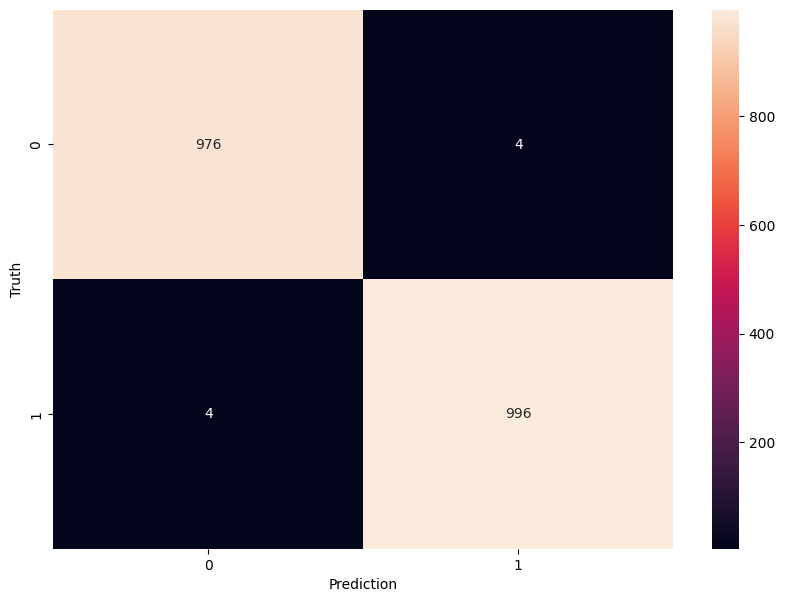

In [28]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')